In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head(10)


(30, 3)


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [8]:

print("Columns:", list(df.columns))
print("\nMissing values:\n", df.isna().sum())
print("\nNumeric summary:")
display(df.describe().T)


Columns: ['Unnamed: 0', 'YearsExperience', 'Salary']

Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [9]:

df = df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")], errors="ignore")

FEATURE = "YearsExperience"
TARGET = "Salary"

assert FEATURE in df.columns and TARGET in df.columns, "Check column names."

X = df[[FEATURE]]
y = df[TARGET]

print(X.shape, y.shape)
df.head()


(30, 1) (30,)


,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


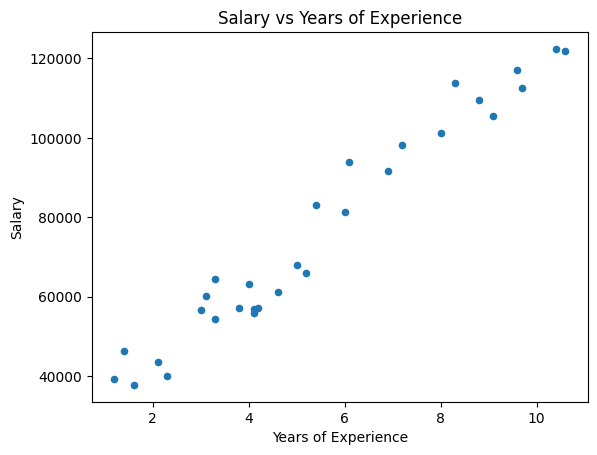

In [10]:
plt.figure()
plt.scatter(X[FEATURE], y, s=20)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.show()


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

len(X_train), len(X_valid)


(24, 6)

In [12]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

coef = float(linreg.coef_[0])
intercept = float(linreg.intercept_)

print({"intercept": intercept, "slope_years_experience": coef})


{'intercept': 24380.201479473704, 'slope_years_experience': 9423.815323030976}


In [13]:
y_pred = linreg.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print({"MAE": mae, "RMSE": rmse, "R2": r2})


{'MAE': 6286.453830757745, 'RMSE': np.float64(7059.04362190151), 'R2': 0.9024461774180497}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


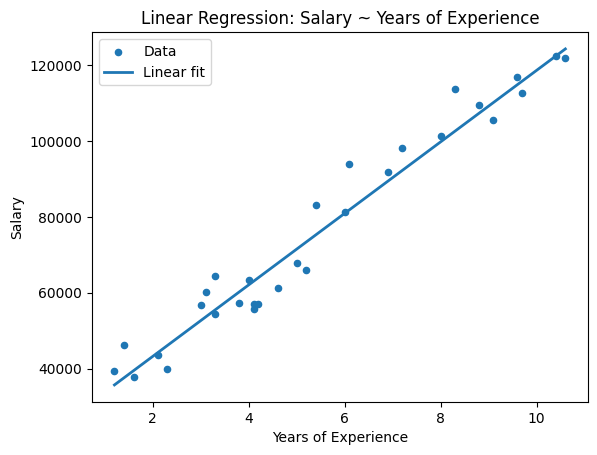

In [14]:

x_line = np.linspace(X[FEATURE].min(), X[FEATURE].max(), 100).reshape(-1, 1)
y_line = linreg.predict(x_line)

plt.figure()
plt.scatter(X[FEATURE], y, s=20, label="Data")
plt.plot(x_line, y_line, linewidth=2, label="Linear fit")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary ~ Years of Experience")
plt.legend()
plt.show()


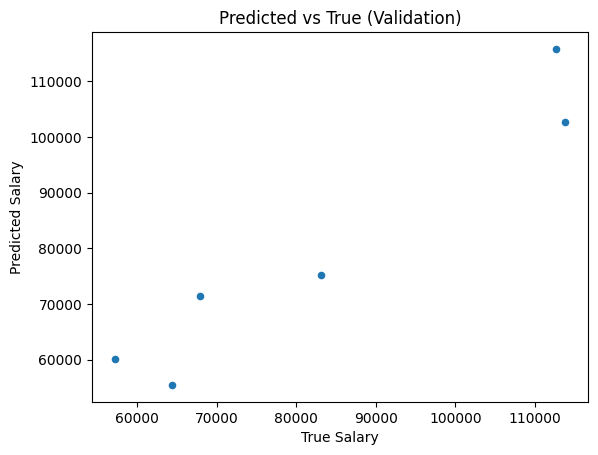

In [16]:

plt.figure()
plt.scatter(y_valid, y_pred, s=20)
plt.xlabel("True Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs True (Validation)")
plt.show()


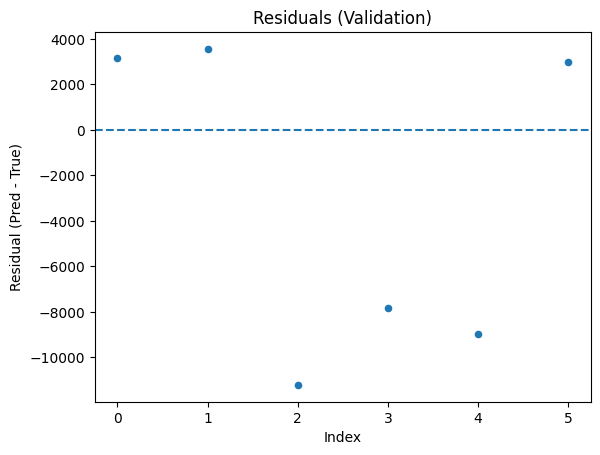

In [17]:
residuals = y_pred - y_valid
plt.figure()
plt.scatter(range(len(residuals)), residuals, s=20)
plt.axhline(0, linestyle="--")
plt.xlabel("Index")
plt.ylabel("Residual (Pred - True)")
plt.title("Residuals (Validation)")
plt.show()